In [4]:
import numpy as np
import pandas as pd

from random import sample

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from itertools import combinations

import matplotlib.pyplot as plt
import plotly.express as px
from scipy.spatial.distance import cdist

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import pairwise_distances_argmin
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [7]:
customers = pd.read_csv("/content/blood.csv")


In [8]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [9]:
label_encoder = LabelEncoder()
df = pd.DataFrame()
c = ['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)', 'Time (months)']#, 'whether he/she donated blood in March 2007']
for column in c:
    df[column] = customers[column]
customers.head()

Recency (months)  Frequency (times)  Monetary (c.c. blood)  Time (months)  \
0                 2                 50                  12500             98   
1                 0                 13                   3250             28   
2                 1                 16                   4000             35   
3                 2                 20                   5000             45   
4                 1                 24                   6000             77   

   whether he/she donated blood in March 2007  
0                                           1  
1                                           1  
2                                           1  
3                                           1  
4                                           0

In [10]:
df.head()

Recency (months)  Frequency (times)  Monetary (c.c. blood)  Time (months)
0                 2                 50                  12500             98
1                 0                 13                   3250             28
2                 1                 16                   4000             35
3                 2                 20                   5000             45
4                 1                 24                   6000             77

Data section need to be edited to use the algorithm on different data set.

In [11]:

D = df.to_numpy()
X = df
n=3#n will be used to generate n*k non-random centroids
k=3

min_domain = X["Monetary (c.c. blood)"].min()
high_domain = X["Monetary (c.c. blood)"].max()
high_df = X[X["Monetary (c.c. blood)"] == high_domain]
low_df = X[X["Monetary (c.c. blood)"] == min_domain]
domain_array = high_df.append(low_df).to_numpy()

#r --> assume domain of sensetive data in a sphere between (-r, r)
#if the data is perfect, it will be between -r and r, and r will be = max or min, but this is not the case.
#to find r for data greater then zero do this:
#1- add r, domain=(0,2r)
#2- add min value, domain=(min,2r+min)
#3- now, we know 2r+min=max, find r
r = []
for i in range(D.shape[1]):
      r.append(((D[:,i].max()+1)-D[:,i].min())/2)
radius_a = 5
print("r = ", r)

r =  [37.5, 25.0, 6125.5, 48.5]


<ipython-input-11-3a5c5cbe47bf>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  domain_array = high_df.append(low_df).to_numpy()


In [12]:
customers.head()

Recency (months)  Frequency (times)  Monetary (c.c. blood)  Time (months)  \
0                 2                 50                  12500             98   
1                 0                 13                   3250             28   
2                 1                 16                   4000             35   
3                 2                 20                   5000             45   
4                 1                 24                   6000             77   

   whether he/she donated blood in March 2007  
0                                           1  
1                                           1  
2                                           1  
3                                           1  
4                                           0

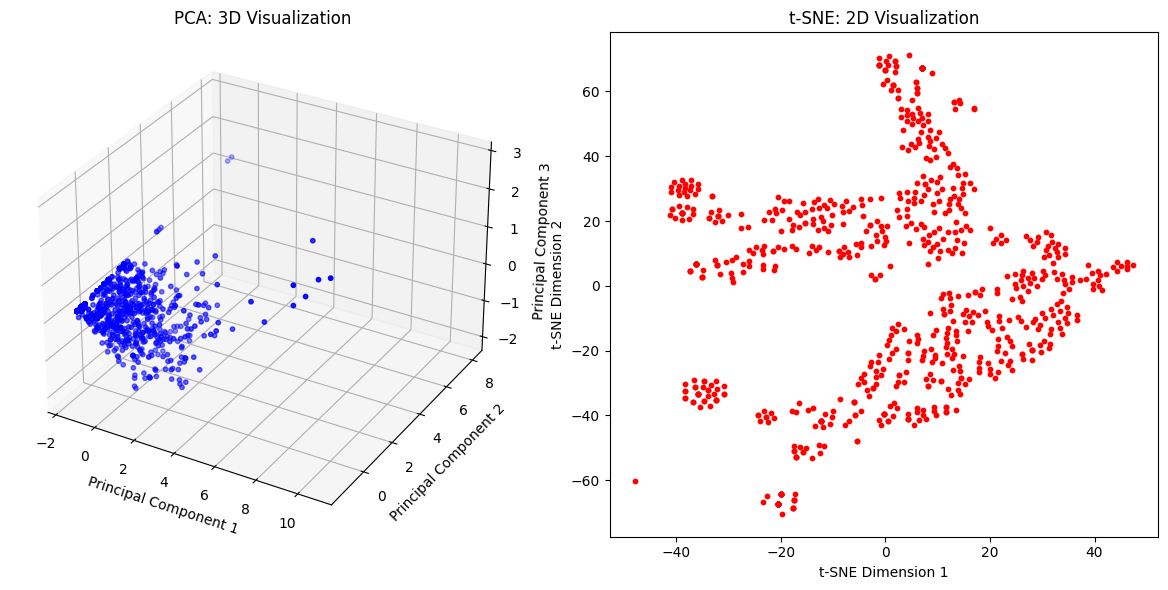

In [58]:


np.random.seed(42)
D2 = df.to_numpy()
data_4d = D2

scaler = StandardScaler()
data_4d_scaled = scaler.fit_transform(data_4d)

pca = PCA(n_components=3)
data_pca = pca.fit_transform(data_4d_scaled)

fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(data_pca[:, 0], data_pca[:, 1], data_pca[:, 2], c='blue', s=10)
ax1.set_title('PCA: 3D Visualization')
ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')
ax1.set_zlabel('Principal Component 3')

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(data_4d_scaled)

ax2 = fig.add_subplot(122)
ax2.scatter(data_tsne[:, 0], data_tsne[:, 1], c='red', s=10)
ax2.set_title('t-SNE: 2D Visualization')
ax2.set_xlabel('t-SNE Dimension 1')
ax2.set_ylabel('t-SNE Dimension 2')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

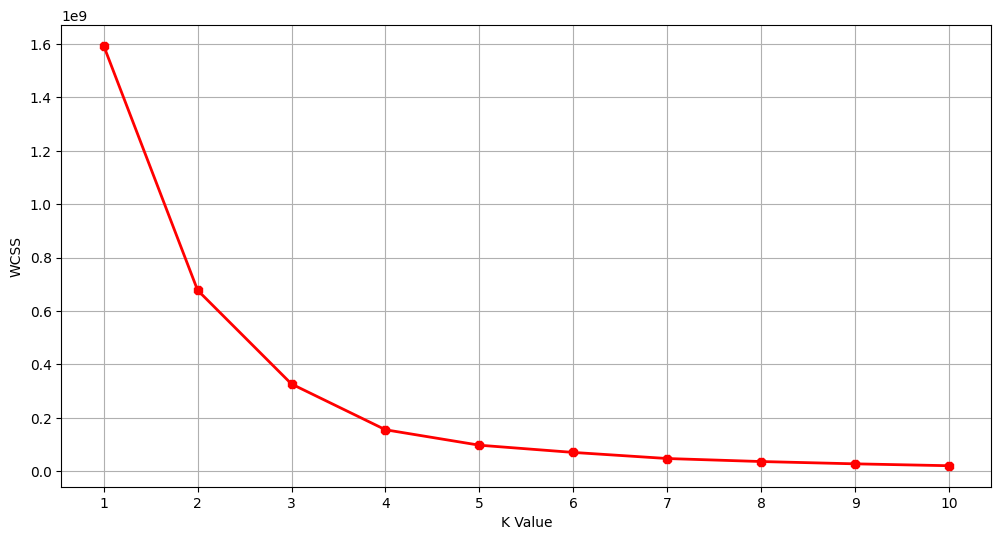

In [13]:
#finding optimal k using elbow method

wcss = []
for new_iter in range(1,11):
    kmeans = KMeans(n_clusters=new_iter, init="k-means++")
    kmeans.fit(X.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [5]:
def find_clusters(X, n_clusters, Initial_C):
    centers = Initial_C

    while True:
        labels = pairwise_distances_argmin(X, centers)
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
        if np.all(centers == new_centers):
            break
        centers = new_centers
    return centers, labels

In [14]:
def Generate_Centroids(D, n, k, domain_array, radius_a):
  Centroid = np.zeros((0, D.shape[1]))
  while (len(Centroid) != n*k):
    random_data = []
    for i in range(D.shape[1]):
      random_data.append(np.random.randint(low=D[:,i].min()+0.1, high=D[:,i].max()+1))
    Random_Centroid = np.array([random_data])
    min_distance = np.min(cdist(Random_Centroid,domain_array))
    if ((min_distance>radius_a) and (len(Centroid)==0)):
        Centroid = np.vstack([Centroid, Random_Centroid])
    if (len(Centroid)!=0):
      min_distance = np.min(cdist(Random_Centroid,Centroid))
      if ((min_distance>2*radius_a)):
        Centroid = np.vstack([Centroid, Random_Centroid])
  return Centroid

In [15]:
def dp(D, k_clusters, n, domainlimit_r, Initial_C, e, max_clustering):

    r=domainlimit_r
    global_sen = np.array(r)*D.shape[1]+1
    privacybudget = e/max_clustering
    C = Initial_C

    for iter in range(max_clustering):
        labels = pairwise_distances_argmin(D, C)
        noise1=[]
        for i in range(D.shape[1]):
          noise1.append(np.random.laplace(global_sen[i]/privacybudget))
        noise2 = np.random.laplace(global_sen[i]/privacybudget)
        new_centers = np.array([((D[labels == i].sum(0)+noise1)/(len(D[labels == i])+noise2)) for i in range(k_clusters*n)])
        if np.all(C == new_centers):
            break
        C = new_centers

    C = np.unique(C, axis=0)
    C_num = len(C)
    while C_num>k_clusters:
      min_dist=float('inf')
      for p in range(C_num):
        for q in range(p+1,C_num):
          dist = np.linalg.norm(C[p]-C[q])
          if dist < min_dist:
            C_p=C[p]
            C_q=C[q]
            C_p_index=p
            C_q_index=q
            min_dist=dist
      C_o = []

      for i in range(D.shape[1]):
        if C_p[i] > C_q[i]:
          min_dimension=C_q[i]
          m=C_p_index
        else:
          min_dimension=C_p[i]
          m=C_q_index
        num_Cm = len(D[labels == m])
        num_Cp = len(D[labels == C_p_index])
        num_Cq = len(D[labels == C_q_index])
        C_o.append(min_dimension+abs(C_p[i]-C_q[i])*num_Cm/(num_Cp+num_Cq))

      C_o=np.array(C_o)
      C[C_q_index]=C_o
      C=np.delete(C, C_p_index, 0)
      C_num=C_num-1
      labels = pairwise_distances_argmin(D, C)
    labels = pairwise_distances_argmin(D, C)
    return C, labels

In [103]:


def dp_adaptive_noise(D, k_clusters, n, domainlimit_r, Initial_C, e, max_clustering, adaptive_factor):
    r = domainlimit_r
    global_sen = np.array(r) * D.shape[1] + 1
    privacybudget = e / max_clustering
    C = Initial_C
    for iter in range(max_clustering):
        labels = pairwise_distances_argmin(D, C)
        noise1 = []
        for i in range(D.shape[1]):
            sensitivity_i = global_sen[i]
            adaptive_privacy_budget = privacybudget * adaptive_factor
            noise1.append(np.random.laplace(sensitivity_i / adaptive_privacy_budget))

        new_centers = np.array([((D[labels == i].sum(0) + noise1) / (len(D[labels == i]) + 1)) for i in range(k_clusters * n)])
        if np.all(C == new_centers):
            break
        C = new_centers
    C = np.unique(C, axis=0)
    C_num = len(C)
    while C_num > k_clusters:
        min_dist = float('inf')
        for p in range(C_num):
            for q in range(p + 1, C_num):
                dist = np.linalg.norm(C[p] - C[q])
                if dist < min_dist:
                    C_p = C[p]
                    C_q = C[q]
                    C_p_index = p
                    C_q_index = q
                    min_dist = dist
        C_o = []

        for i in range(D.shape[1]):
            if C_p[i] > C_q[i]:
                min_dimension = C_q[i]
                m = C_p_index
            else:
                min_dimension = C_p[i]
                m = C_q_index
            num_Cm = len(D[labels == m])
            num_Cp = len(D[labels == C_p_index])
            num_Cq = len(D[labels == C_q_index])
            C_o.append(min_dimension + abs(C_p[i] - C_q[i]) * num_Cm / (num_Cp + num_Cq))

        C_o = np.array(C_o)
        C[C_q_index] = C_o
        C = np.delete(C, C_p_index, 0)
        C_num = C_num - 1
        labels = pairwise_distances_argmin(D, C)

    labels = pairwise_distances_argmin(D, C)
    return C, labels


In [81]:


def dp_gaussian_noise(D, k_clusters, n, domainlimit_r, Initial_C, e, max_clustering, gaussian_factor):
    r = domainlimit_r
    global_sen = np.array(r) * D.shape[1] + 1
    privacybudget = e / max_clustering
    C = Initial_C
    for iter in range(max_clustering):
        labels = pairwise_distances_argmin(D, C)
        noise1 = []
        for i in range(D.shape[1]):
            sensitivity_i = global_sen[i]
            adaptive_privacy_budget = privacybudget * gaussian_factor
            noise1.append(np.random.normal(scale=sensitivity_i / adaptive_privacy_budget))

        new_centers = np.array([((D[labels == i].sum(0) + noise1) / (len(D[labels == i]) + 1)) for i in range(k_clusters * n)])
        if np.all(C == new_centers):
            break
        C = new_centers
    C = np.unique(C, axis=0)
    C_num = len(C)
    while C_num > k_clusters:
        min_dist = float('inf')
        for p in range(C_num):
            for q in range(p + 1, C_num):
                dist = np.linalg.norm(C[p] - C[q])
                if dist < min_dist:
                    C_p = C[p]
                    C_q = C[q]
                    C_p_index = p
                    C_q_index = q
                    min_dist = dist
        C_o = []

        for i in range(D.shape[1]):
            if C_p[i] > C_q[i]:
                min_dimension = C_q[i]
                m = C_p_index
            else:
                min_dimension = C_p[i]
                m = C_q_index
            num_Cm = len(D[labels == m])
            num_Cp = len(D[labels == C_p_index])
            num_Cq = len(D[labels == C_q_index])
            C_o.append(min_dimension + abs(C_p[i] - C_q[i]) * num_Cm / (num_Cp + num_Cq))

        C_o = np.array(C_o)
        C[C_q_index] = C_o
        C = np.delete(C, C_p_index, 0)
        C_num = C_num - 1
        labels = pairwise_distances_argmin(D, C)

    labels = pairwise_distances_argmin(D, C)
    return C, labels


In [17]:
D.shape

(748, 4)

In [18]:
# Finding NaN values in the dataset
nan_indices = np.isnan(D)

# Replace NaN values with the mean of each column
column_means = np.nanmean(D, axis=0)
D[nan_indices] = np.take(column_means, np.where(nan_indices)[1])

print(D)

[[    2    50 12500    98]
 [    0    13  3250    28]
 [    1    16  4000    35]
 ...
 [   23     3   750    62]
 [   39     1   250    39]
 [   72     1   250    72]]


In [19]:
D.shape

(748, 4)

In [20]:
n=2
init_cent = Generate_Centroids(D, n, k, domain_array, radius_a)
init_cent

array([[2.400e+01, 1.600e+01, 6.914e+03, 3.300e+01],
       [5.000e+01, 4.700e+01, 1.158e+04, 4.800e+01],
       [1.000e+00, 5.000e+00, 9.290e+02, 9.400e+01],
       [1.400e+01, 1.700e+01, 3.590e+03, 5.500e+01],
       [0.000e+00, 3.500e+01, 5.656e+03, 9.500e+01],
       [7.100e+01, 4.200e+01, 8.247e+03, 5.200e+01]])

In [21]:
centers_original, labels_original = find_clusters(D, k, init_cent)
print(centers_original)
print(labels_original)
centers_df, labels_df = dp(D, k, n, r, init_cent, 70, 3)
print(centers_df)
print(labels_df)

[[6.63909774e+00 1.30375940e+01 3.25939850e+03 5.81278195e+01]
 [5.25000000e+00 4.11250000e+01 1.02812500e+04 9.38750000e+01]
 [1.01911038e+01 3.39703460e+00 8.49258649e+02 2.82718287e+01]]
[1 0 0 0 0 2 2 0 0 1 0 2 0 0 2 2 0 0 2 2 2 0 2 2 0 0 2 0 2 2 0 0 0 0 0 2 0
 2 0 2 0 2 2 2 0 0 0 2 2 2 0 0 2 0 2 0 2 2 0 2 2 2 0 2 2 0 2 2 2 0 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 2 2 2 0 0 2 2 0 2 2 2 0 2
 0 2 2 0 0 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 2 2 0 2 2 0 0 2 2 2 2 2 2
 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 0 2
 0 2 2 0 2 2 2 2 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 2 0 2 2 2 2
 0 2 0 2 2 2 2 2 2 2 2 0 2 2 2 2 2 0 2 0 2 0 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 0 2 0 2 2 2 2 2 2 0 2 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 0 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2

<ipython-input-5-3cf7cdb1f043>:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if np.all(centers == new_centers):


In [71]:
Encode = {0:"Group 1", 1:"Group 2", 2:"Group 3"}
labels_frame_original = pd.Series(data=labels_original).map(Encode)
fig = px.scatter_matrix(df, dimensions=['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)', 'Time (months)'], color=labels_frame_original, title="Original K-Means Plots")
fig.update_layout(font_size=7)
fig.update_layout(legend_font_size=20)
fig.show()

In [104]:
Encode = {0:"Group 1", 1:"Group 2", 2:"Group 3"}

labels_frame_df = pd.Series(data=labels_df).map(Encode)
fig = px.scatter_matrix(X, dimensions=['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)', 'Time (months)'], color=labels_frame_df, title="DP K-Means Plots")
fig.update_layout(font_size=7)
fig.update_layout(legend_font_size=13)
fig.show()

In [105]:
'Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)', 'Time (months)', 'whether he/she donated blood in March 2007'
fig = px.scatter_3d(X, x='Recency (months)', y='Monetary (c.c. blood)',  z='Time (months)', color=labels_frame_original, title="Normal K-Means 3D")
fig.update_layout(font_size=9)
fig.update_layout(legend_font_size=12)
fig.show()

In [106]:
fig = px.scatter_3d(X, x='Recency (months)', y='Monetary (c.c. blood)',  z='Time (months)', color=labels_frame_df, title="DP K-Means 3D")
fig.update_layout(font_size=9)
fig.update_layout(legend_font_size=12)
fig.show()

In [26]:
maxValues = df.max()
maxValues

Recency (months)            74
Frequency (times)           50
Monetary (c.c. blood)    12500
Time (months)               98
dtype: int64

In [27]:
minValues = df.min()
minValues

Recency (months)           0
Frequency (times)          1
Monetary (c.c. blood)    250
Time (months)              2
dtype: int64

In [28]:
n2=3
radius_a2 = 15
D2 = df.to_numpy()

In [87]:
init_cent = Generate_Centroids(D2, n2, k, domain_array, radius_a2)
init_cent

array([[2.2000e+01, 1.0000e+01, 3.0990e+03, 5.3000e+01],
       [9.0000e+00, 1.9000e+01, 2.7390e+03, 9.7000e+01],
       [0.0000e+00, 5.0000e+00, 4.8610e+03, 1.7000e+01],
       [2.3000e+01, 1.6000e+01, 6.1280e+03, 3.0000e+00],
       [3.1000e+01, 2.7000e+01, 1.1010e+03, 2.5000e+01],
       [1.1000e+01, 5.0000e+01, 1.2188e+04, 3.4000e+01],
       [3.2000e+01, 4.3000e+01, 5.9820e+03, 1.3000e+01],
       [6.6000e+01, 1.0000e+00, 5.7860e+03, 4.1000e+01],
       [7.3000e+01, 4.3000e+01, 7.9730e+03, 3.0000e+01]])

In [84]:
has_nan = np.any(np.isnan(init_cent),axis=None)

if has_nan:
    print("init_cent contains NaN values.")
else:
    print("init_cent does not contain NaN values.")


init_cent does not contain NaN values.


In [88]:
centers_original, labels_original = find_clusters(D2, k, init_cent)
# if there is an error rerun the centroid generation step above again

<ipython-input-5-3cf7cdb1f043>:14: DeprecationWarning:

elementwise comparison failed; this will raise an error in the future.



In [91]:
centers_df_e1, labels_df_e1 = dp(D2, k, n2, r, init_cent, 0.1, 6)
centers_df_e2, labels_df_e2 = dp(D2, k, n2, r, init_cent, 1, 6)
centers_df_e3, labels_df_e3 = dp(D2, k, n2, r, init_cent, 5, 6)
centers_df_e4, labels_df_e4 = dp(D2, k, n2, r, init_cent, 25, 6)
centers_df_e5, labels_df_e5 = dp(D2, k, n2, r, init_cent, 50, 6)
#centers_df_e6, labels_df_e6 = dp(D2, k, n2, r, init_cent, 100, 6)

In [93]:
centers_df_e1_an, labels_df_e1_an = dp_adaptive_noise(D2, k, n2, r, init_cent, 0.1, 6,0.5)
centers_df_e2_an, labels_df_e2_an = dp_adaptive_noise(D2, k, n2, r, init_cent, 1, 6,0.5)
centers_df_e3_an, labels_df_e3_an = dp_adaptive_noise(D2, k, n2, r, init_cent, 5, 6,0.5)
centers_df_e4_an, labels_df_e4_an = dp_adaptive_noise(D2, k, n2, r, init_cent, 25, 6,0.5)
centers_df_e5_an, labels_df_e5_an = dp_adaptive_noise(D2, k, n2, r, init_cent, 50, 6,0.5)
#centers_df_e6_an, labels_df_e6_an = dp_adaptive_noise(D2, k, n2, r, init_cent, 100, 6,0.5)


In [94]:
centers_df_e1_gn, labels_df_e1_gn = dp_gaussian_noise(D2, k, n2, r, init_cent, 0.1, 6,0.5)
centers_df_e2_gn, labels_df_e2_gn = dp_gaussian_noise(D2, k, n2, r, init_cent, 1, 6,0.5)
centers_df_e3_gn, labels_df_e3_gn = dp_gaussian_noise(D2, k, n2, r, init_cent, 5, 6,0.5)
centers_df_e4_gn, labels_df_e4_gn = dp_gaussian_noise(D2, k, n2, r, init_cent, 25, 6,0.5)
centers_df_e5_gn, labels_df_e5_gn = dp_gaussian_noise(D2, k, n2, r, init_cent, 50, 6,0.5)
#centers_df_e6_gn, labels_df_e6_gn = dp_gaussian_noise(D2, k, n2, r, init_cent, 100, 6,0.5)

In [114]:
Encode = {0:"Group 1", 1:"Group 2", 2:"Group 3"}
labels_frame_original = pd.Series(data=labels_original).map(Encode)
fig = px.scatter_matrix(df  , dimensions=['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)', 'Time (months)'], color=labels_frame_original, title="Original K-Means Plots")
fig.update_layout(font_size=7)
fig.update_layout(legend_font_size=13)
fig.show()

In [79]:
labels_frame_df = pd.Series(data=labels_df_e4).map(Encode)
fig = px.scatter_matrix(df, dimensions=['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)', 'Time (months)'], color=labels_frame_df, title="DP K-Means Plots with average noise")
fig.update_layout(font_size=7)
fig.update_layout(legend_font_size=13)
fig.show()

In [75]:
labels_frame_df_an = pd.Series(data=labels_df_e5_an).map(Encode)
fig = px.scatter_matrix(df, dimensions=['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)', 'Time (months)'], color=labels_frame_df_an, title="DP K-Means using Gaussian Noise Plots with e=50 ")
fig.update_layout(font_size=7)
fig.update_layout(legend_font_size=13)
fig.show()

In [98]:
labels_frame_df_gn = pd.Series(data=labels_df_e5_gn).map(Encode)
fig = px.scatter_matrix(df, dimensions=['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)', 'Time (months)'], color=labels_frame_df_an, title="DP K-Means using Gaussian Noise Plots with e=50 ")
fig.update_layout(font_size=7)
fig.update_layout(legend_font_size=13)
fig.show()

In [77]:
#'Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)', 'Time (months)', 'whether he/she donated blood in March 2007'
fig = px.scatter_3d(df, x='Recency (months)', y='Monetary (c.c. blood)',  z='Time (months)', color=labels_frame_original, title="Normal K-Means 3D")
fig.update_layout(font_size=9)
fig.update_layout(legend_font_size=12)
fig.show()

In [115]:
fig = px.scatter_3d(df, x='Recency (months)', y='Monetary (c.c. blood)',  z='Time (months)', color=labels_frame_df, title="DP K-Means 3D with e=25")
fig.update_layout(font_size=9)
fig.update_layout(legend_font_size=12)
fig.show()

In [102]:
labels_frame_df_gn = pd.Series(data=labels_df_e5_gn).map(Encode)

fig = px.scatter_3d(df, x='Recency (months)', y='Monetary (c.c. blood)',  z='Time (months)', color=labels_frame_df_an, title="DP K-Means 3D using Adapative noise with e=25")
fig.update_layout(font_size=9)
fig.update_layout(legend_font_size=12)
fig.show()

In [100]:
fig = px.scatter_3d(df, x='Recency (months)', y='Monetary (c.c. blood)',  z='Time (months)', color=labels_frame_df_gn, title="DP K-Means_AN 3D using Gaussian Noise and e=25")
fig.update_layout(font_size=9)
fig.update_layout(legend_font_size=12)
fig.show()

In [46]:
def Error_Labels(labels_original, labels_df):
  labelO0 = []
  labelO1 = []
  labelO2 = []
  labelO3 = []
  labelO4 = []
  for i in range (len(labels_original)):
    if (labels_original[i] == 0):
      labelO0.append(labels_original[i])
    elif (labels_original[i] == 1):
      labelO1.append(labels_original[i])
    elif (labels_original[i] == 2):
      labelO2.append(labels_original[i])
    elif (labels_original[i] == 3):
      labelO3.append(labels_original[i])
    else:
      labelO4.append(labels_original[i])

  arr_o = [len(labelO0), len(labelO1), len(labelO2), len(labelO3), len(labelO4)]


  labelDF0 = []
  labelDF1 = []
  labelDF2 = []
  labelDF3 = []
  labelDF4 = []
  for i in range (len(labels_df)):
    if (labels_df[i] == 0):
      labelDF0.append(labels_df[i])
    elif (labels_df[i] == 1):
      labelDF1.append(labels_df[i])
    elif (labels_df[i] == 2):
      labelDF2.append(labels_df[i])
    elif (labels_df[i] == 3):
      labelDF3.append(labels_df[i])
    else:
      labelDF4.append(labels_df[i])
    print(labelDF0)
  arr_df = [len(labelDF0), len(labelDF1), len(labelDF2), len(labelDF3), len(labelDF4)]

  error = 0
  while (len(arr_o) > 0):
    minDist = abs(arr_o[0] - arr_df[0])
    for i in range(len(arr_o)):
      for j in range(len(arr_df)):
        if (abs(arr_o[i] - arr_df[j]) <= minDist):
          minDist = abs(arr_o[i] - arr_df[j])
          e1 = i
          e2 = j
    init_error = (abs(arr_o[e1] - arr_df[e2]))**2
    error = error + init_error
    arr_o.remove(arr_o[e1])
    arr_df.remove(arr_df[e2])
  return error



In [47]:
def error_centroid(centers_original, centers_df):
    centers_original_ordered=[]
    centers_df_ordered=[]

    centers_original_copy = np.copy(centers_original)
    centers_df_copy = np.copy(centers_df)

    for c in range(len(centers_original_copy)):
        min_dist=float('inf')
        min_orignal_dist_index=-1
        min_dp_dist_index=-1
        for i in range(len(centers_original_copy)):
            for j in range(len(centers_df_copy)):
                dist = np.linalg.norm(centers_original_copy[i]-centers_df_copy[j])
                if dist < min_dist:
                    min_orignal_dist_index=i
                    min_dp_dist_index=j
                    min_dist=dist

        centers_original_ordered.append(centers_original_copy[min_orignal_dist_index])
        centers_df_ordered.append(centers_df_copy[min_dp_dist_index])

        centers_original_copy=np.delete(centers_original_copy, min_orignal_dist_index, axis=0)
        centers_df_copy=np.delete(centers_df_copy, min_dp_dist_index, axis=0)

    centers_original_ordered = np.array(centers_original_ordered)
    centers_df_ordered = np.array(centers_df_ordered)

    mse_cent = ((centers_original - centers_df_ordered)**2).mean(axis=0)
    return np.sum(mse_cent)

In [48]:
label_error_e1 = Error_Labels(labels_original, labels_df_e1)
label_error_e2 = Error_Labels(labels_original, labels_df_e2)
label_error_e3 = Error_Labels(labels_original, labels_df_e3)
label_error_e4 = Error_Labels(labels_original, labels_df_e4)
label_error_e5 = Error_Labels(labels_original, labels_df_e5)
# label_error_e6 = Error_Labels(labels_original, labels_df_e6)

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[

In [109]:
label_error_e1_gn = Error_Labels(labels_original, labels_df_e1_gn)
label_error_e2_gn = Error_Labels(labels_original, labels_df_e2_gn)
label_error_e3_gn = Error_Labels(labels_original, labels_df_e3_gn)
label_error_e4_gn = Error_Labels(labels_original, labels_df_e6_gn)
label_error_e5_gn = Error_Labels(labels_original, labels_df_e5_gn)

[0]
[0, 0]
[0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [49]:
label_error_e1_an = Error_Labels(labels_original, labels_df_e1_an)
label_error_e2_an = Error_Labels(labels_original, labels_df_e2_an)
label_error_e3_an = Error_Labels(labels_original, labels_df_e3_an)
label_error_e4_an = Error_Labels(labels_original, labels_df_e4_an)
label_error_e5_an = Error_Labels(labels_original, labels_df_e5_an)

[0]
[0, 0]
[0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [107]:
label_error_an = pd.DataFrame(data={'Epsilon':[0.1, 1, 5, 25, 50],'Error':[label_error_e1_an, label_error_e2_an, label_error_e3_an, label_error_e4_an, label_error_e5_an]})#,label_error_e5,  label_error_e6

label_error_an

Epsilon  Error
0      0.1  37634
1      1.0  37634
2      5.0  27944
3     25.0  26546
4     50.0   1152

In [68]:
fig = px.line(label_error_an, x="Epsilon", y="Error", title="Error of Labels Difference over different number of Epsilon of AN gaussian noise")
fig.show()

In [111]:
label_error_gn = pd.DataFrame(data={'Epsilon':[0.1, 1, 5, 25, 50],'Error':[label_error_e1_gn, label_error_e2_gn, label_error_e3_gn, label_error_e4_gn, label_error_e5_gn]})#,label_error_e5,  label_error_e6

label_error_gn

Epsilon  Error
0      0.1  55328
1      1.0  55328
2      5.0  53192
3     25.0  21242
4     50.0   5642

In [113]:
fig = px.line(label_error_an, x="Epsilon", y="Error", title="Error of Labels Difference over different number of Epsilon of AN gaussian noise")
fig.show()

In [112]:
#label_error = pd.DataFrame(data={'Epsilon':[0.1, 1, 5, 25, 50],'Error':[label_error_e5,label_error_e4, label_error_e3, label_error_e1, label_error_e2]})
label_error = pd.DataFrame(data={'Epsilon':[0.1, 1, 5, 25, 50],'Error':[label_error_e1, label_error_e2, label_error_e3, label_error_e4, label_error_e5]})#,label_error_e5,  label_error_e6
label_error

Epsilon   Error
0      0.1   37634
1      1.0     978
2      5.0   83762
3     25.0  108542
4     50.0  133512

In [78]:
fig = px.line(label_error, x="Epsilon", y="Error", title="Error of Labels Difference over different number of Epsilon for kmeans using Average Noise")
fig.show()